# Dictionary of Secondary Structure of Proteins (DSSP) assigns eight state secondary structure using hydrogen bonds alone

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
 
sns.set_color_codes("pastel")
#sns.set(style="white")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
dfu=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_unmod/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()
dfua=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_unmod_ack4/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()

In [4]:
dft=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_trans63/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()
dfta=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_trans63_ack4/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()

In [5]:
dfc=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_cis63/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()
dfca=pd.read_csv("/home/caiy/56_H4_Histone/1kx5_cis63_ack4/Analyses/DSSP/dssp.gnu.sum", header=0, delim_whitespace=True).reset_index()

In [6]:
dfu[:5]

,index,#Residue,Para,Anti,3-10,Alpha,Pi,Turn,Bend
0,0,430,0.0000,0.0000,0.0000,0.0000,0,0.0000,0.0000
1,1,431,0.0000,0.1280,0.1828,0.0244,0,0.3411,0.0000
2,2,432,0.0016,0.0000,0.1828,0.0244,0,0.5258,0.2654
3,3,433,0.0000,0.0000,0.1828,0.0244,0,0.2911,0.3975
4,4,434,0.0000,0.0001,0.0000,0.0244,0,0.5435,0.3181


In [7]:
shape(dfu)

(31, 9)

In [8]:
dfua[:5]

,index,#Residue,Para,Anti,3-10,Alpha,Pi,Turn,Bend
0,0,430,0,0.0000,0,0,0,0.0000,0.0000
1,1,431,0,0.0000,0,0,0,0.0324,0.0000
2,2,432,0,0.0000,0,0,0,0.0336,0.3525
3,3,433,0,0.0016,0,0,0,0.0011,0.0124
4,4,434,0,0.8343,0,0,0,0.0000,0.0016


In [9]:
dfu["Beta"]=dfu["Para"]+dfu["Anti"]
dfua["Beta"]=dfua["Para"]+dfua["Anti"]

dft["Beta"]=dft["Para"]+dft["Anti"]
dfta["Beta"]=dfta["Para"]+dfta["Anti"]

dfc["Beta"]=dfc["Para"]+dfc["Anti"]
dfca["Beta"]=dfca["Para"]+dfca["Anti"]

In [10]:
label_fix=['SER-1','GLY-2','ARG-3','GLY-4','* LYS-5','GLY-6','GLY-7','* LYS-8','GLY-9','LEU-10','GLY-11','* LYS-12','GLY-13','GLY-14','ALA-15','* LYS-16','ARG-17','HIE-18','ARG-19','LYS-20','VAL-21','LEU-22','ARG-23','ASP-24','ASN-25','ILE-26','GLN-27','GLY-28','ILE-29','THR-30']

In [11]:
label_fix =[x + '            ' for x in label_fix]

## More beta bridges in the lesion-containing cases; for the lesion-free one, they make and break at different regions along the H4 tail.

## Alpha helix

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


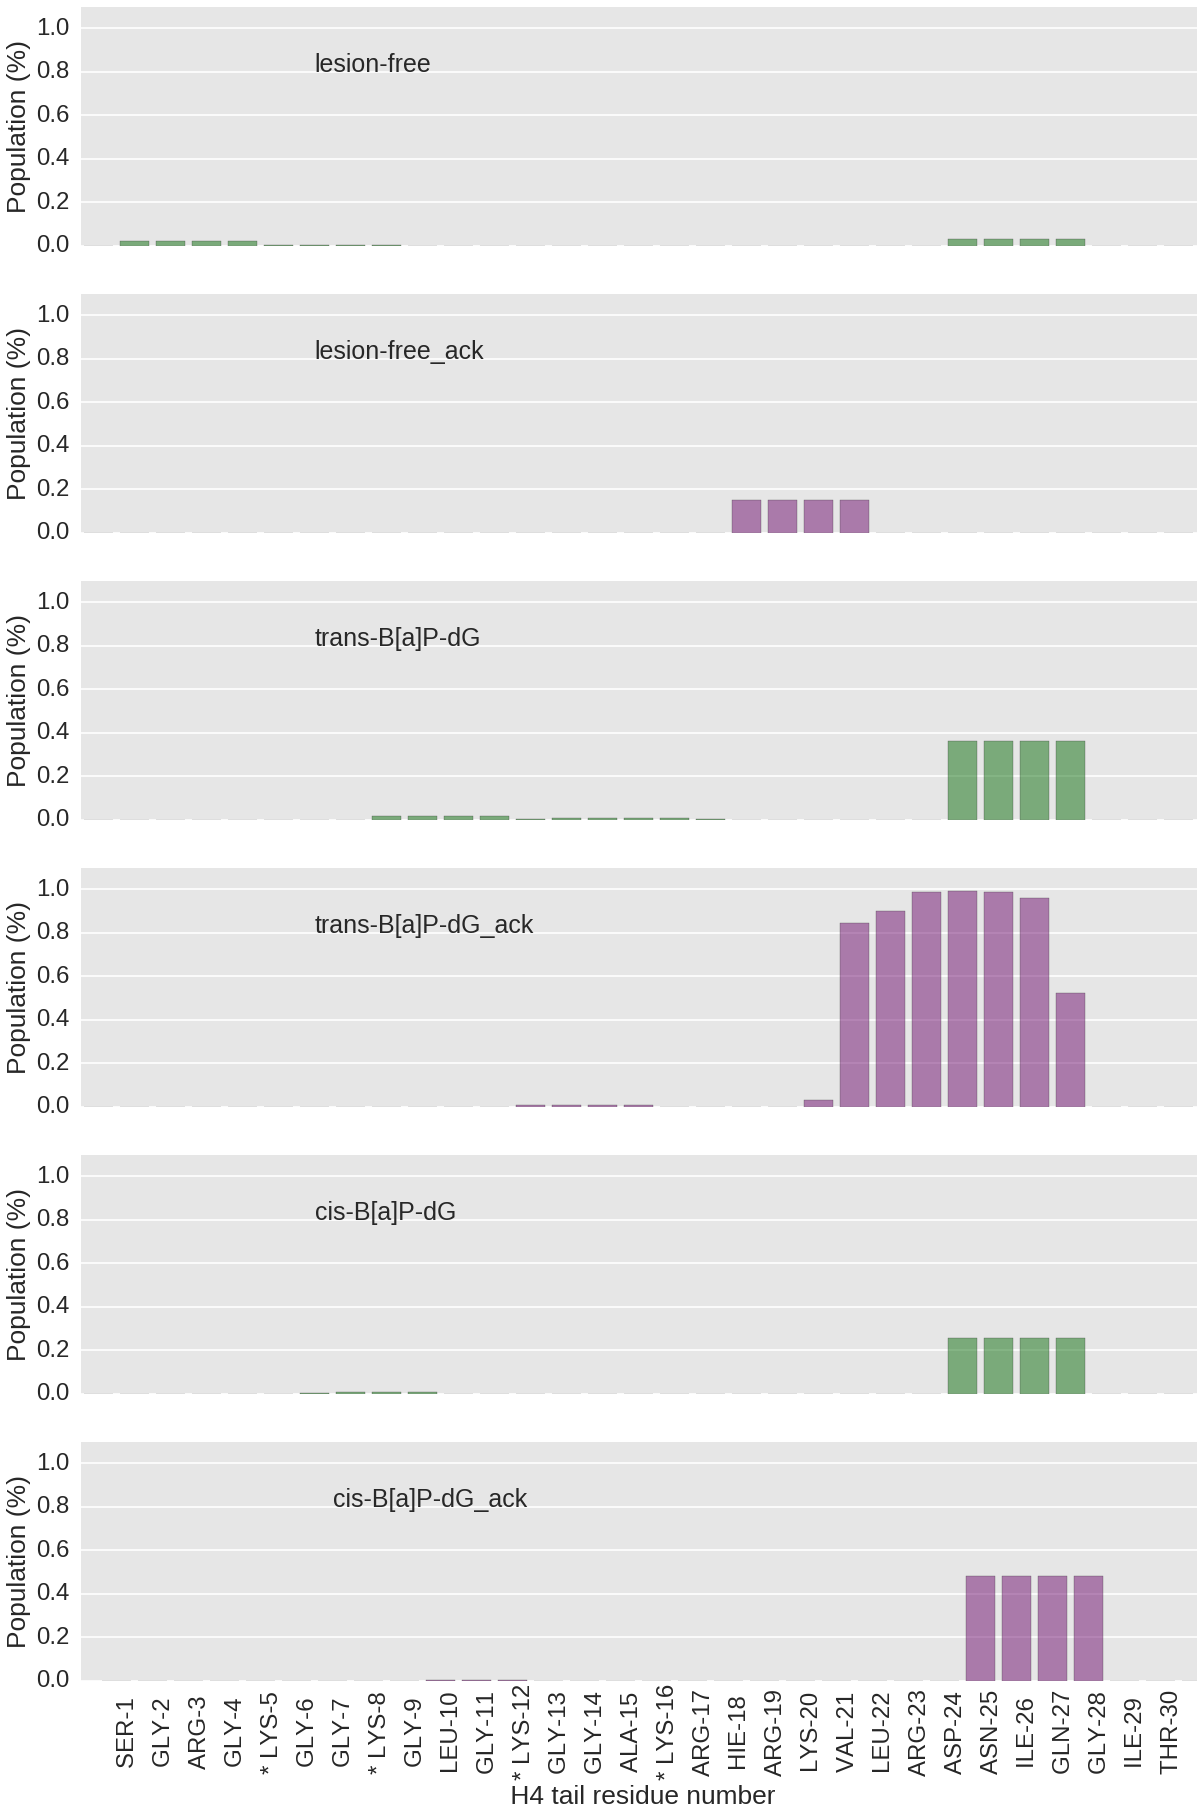

In [31]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(6, 1, figsize=(20, 30), sharey=True)
#plt.tight_layout()

#sns.set_style("darkgrid")
#sns.set_style("darkgrid")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.barplot(dfu["#Residue"],dfu["Alpha"],color="green", alpha=0.5,ax=ax1)
sns.barplot(dfua["#Residue"],dfua["Alpha"],color="purple",alpha=0.5,ax=ax2)

sns.barplot(dfu["#Residue"],dft["Alpha"],color="green",alpha=0.5, ax=ax3)
sns.barplot(dfua["#Residue"],dfta["Alpha"],color="purple",alpha=0.5,ax=ax4)

sns.barplot(dfu["#Residue"],dfc["Alpha"],color="green",alpha=0.5, ax=ax5)
sns.barplot(dfua["#Residue"],dfca["Alpha"],color="purple",alpha=0.5,ax=ax6)

ax1.text(6,0.8, 'lesion-free', fontsize=30)
ax3.text(6,0.8,  'trans-B[a]P-dG', fontsize=30)
ax5.text(6,0.8,  'cis-B[a]P-dG', fontsize=30)

ax2.text(6,0.8,  'lesion-free_ack', fontsize=30)
ax4.text(6,0.8,  'trans-B[a]P-dG_ack', fontsize=30)
ax6.text(6,0.8,  'cis-B[a]P-dG_ack', fontsize=30)

#ax1.xaxis.set_ticks(np.arange(0, 30, 1))
ax2.xaxis.set_ticks(np.arange(0, 30, 1))
#ax3.xaxis.set_ticks(np.arange(0, 30, 1))
ax4.xaxis.set_ticks(np.arange(0, 30, 1))
#ax5.xaxis.set_ticks(np.arange(0, 30, 1))
ax6.xaxis.set_ticks(np.arange(0, 30, 1))

#ax1.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax2.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax3.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax4.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax5.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
ax6.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")

ax1.set(xticklabels=[])
ax3.set(xticklabels=[])
ax5.set(xticklabels=[])
ax2.set(xticklabels=[])
ax4.set(xticklabels=[])

a=ax1.get_xticks().tolist()
print(a)

ax1.set_xlabel(' ')
ax1.set_ylabel('Population (%)')
ax2.set_xlabel(' ')
ax2.set_ylabel('Population (%)')
ax3.set_xlabel(' ')
ax3.set_ylabel('Population (%)')
ax4.set_xlabel(' ')
ax4.set_ylabel('Population (%)')
ax5.set_xlabel(' ')
ax5.set_ylabel('Population (%)')
ax6.set_xlabel(' H4 tail residue number')
ax6.set_ylabel('Population (%)')

ax6.set_xlim(-1,30)
ax6.set_ylim(0,1.1)

f.savefig('alpha.png', dpi=600)

In [13]:
label_fix

['SER-1            ',
 'GLY-2            ',
 'ARG-3            ',
 'GLY-4            ',
 '* LYS-5            ',
 'GLY-6            ',
 'GLY-7            ',
 '* LYS-8            ',
 'GLY-9            ',
 'LEU-10            ',
 'GLY-11            ',
 '* LYS-12            ',
 'GLY-13            ',
 'GLY-14            ',
 'ALA-15            ',
 '* LYS-16            ',
 'ARG-17            ',
 'HIE-18            ',
 'ARG-19            ',
 'LYS-20            ',
 'VAL-21            ',
 'LEU-22            ',
 'ARG-23            ',
 'ASP-24            ',
 'ASN-25            ',
 'ILE-26            ',
 'GLN-27            ',
 'GLY-28            ',
 'ILE-29            ',
 'THR-30            ']

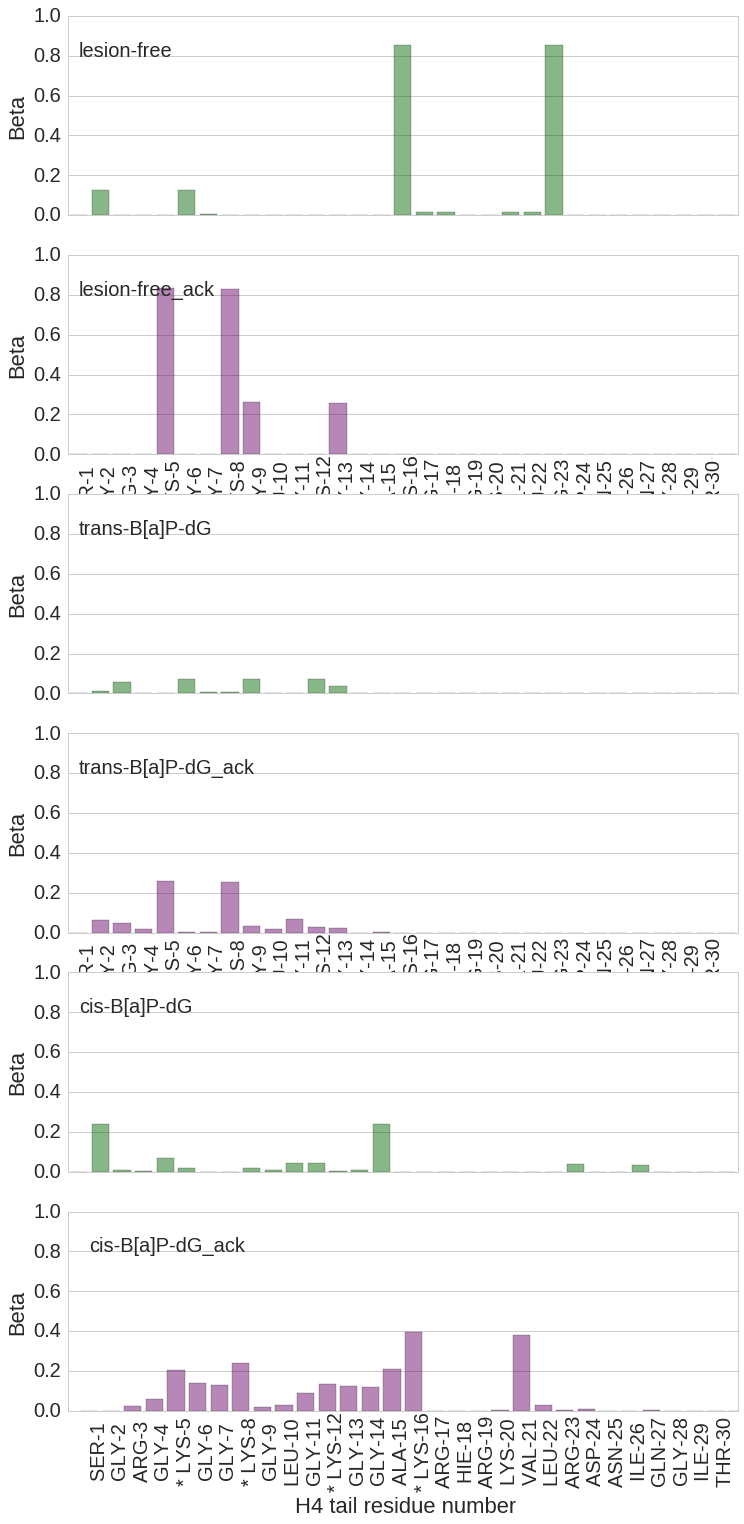

In [15]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(6, 1, figsize=(12, 25), sharey=True)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5})

sns.barplot(dfu["#Residue"],dfu["Beta"],color="green",alpha=0.5, ax=ax1)
sns.barplot(dfua["#Residue"],dfua["Beta"],color="purple",alpha=0.5,ax=ax2)
sns.barplot(dfu["#Residue"],dft["Beta"],color="green", alpha=0.5,ax=ax3)
sns.barplot(dfua["#Residue"],dfta["Beta"],color="purple",alpha=0.5, ax=ax4)
sns.barplot(dfu["#Residue"],dfc["Beta"],color="green",alpha=0.5, ax=ax5)
sns.barplot(dfua["#Residue"],dfca["Beta"],color="purple",alpha=0.5, ax=ax6)

ax1.text(0,0.8, 'lesion-free', fontsize=20)
ax3.text(0,0.8,  'trans-B[a]P-dG', fontsize=20)
ax5.text(0,0.8,  'cis-B[a]P-dG', fontsize=20)

ax2.text(0,0.8,  'lesion-free_ack', fontsize=20)
ax4.text(0,0.8,  'trans-B[a]P-dG_ack', fontsize=20)
ax6.text(0,0.8,  'cis-B[a]P-dG_ack', fontsize=20)

ax1.set_xlabel(' ')
ax1.set_ylabel('Beta')
ax2.set_xlabel(' ')
ax2.set_ylabel('Beta')
ax3.set_xlabel(' ')
ax3.set_ylabel('Beta')
ax4.set_xlabel(' ')
ax4.set_ylabel('Beta')
ax5.set_xlabel(' ')
ax5.set_ylabel('Beta')
ax6.set_xlabel(' H4 tail residue number')
ax6.set_ylabel('Beta')


ax1.xaxis.set_ticks(np.arange(0, 30, 1))
ax2.xaxis.set_ticks(np.arange(0, 30, 1))
ax3.xaxis.set_ticks(np.arange(0, 30, 1))

ax4.xaxis.set_ticks(np.arange(0, 30, 1))
ax5.xaxis.set_ticks(np.arange(0, 30, 1))
ax6.xaxis.set_ticks(np.arange(0, 30, 1))


#ax1.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
ax2.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax3.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
ax4.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
#ax5.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")
ax6.set_xticklabels(label_fix, rotation=90,rotation_mode="anchor")

ax1.set(xticklabels=[])
ax3.set(xticklabels=[])
ax5.set(xticklabels=[])


ax6.set_xlim(-1,30)
ax6.set_ylim(0,1.0)

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

f.savefig('beta.png', dpi=600)

## Beta-bridges

## 

## 3-10

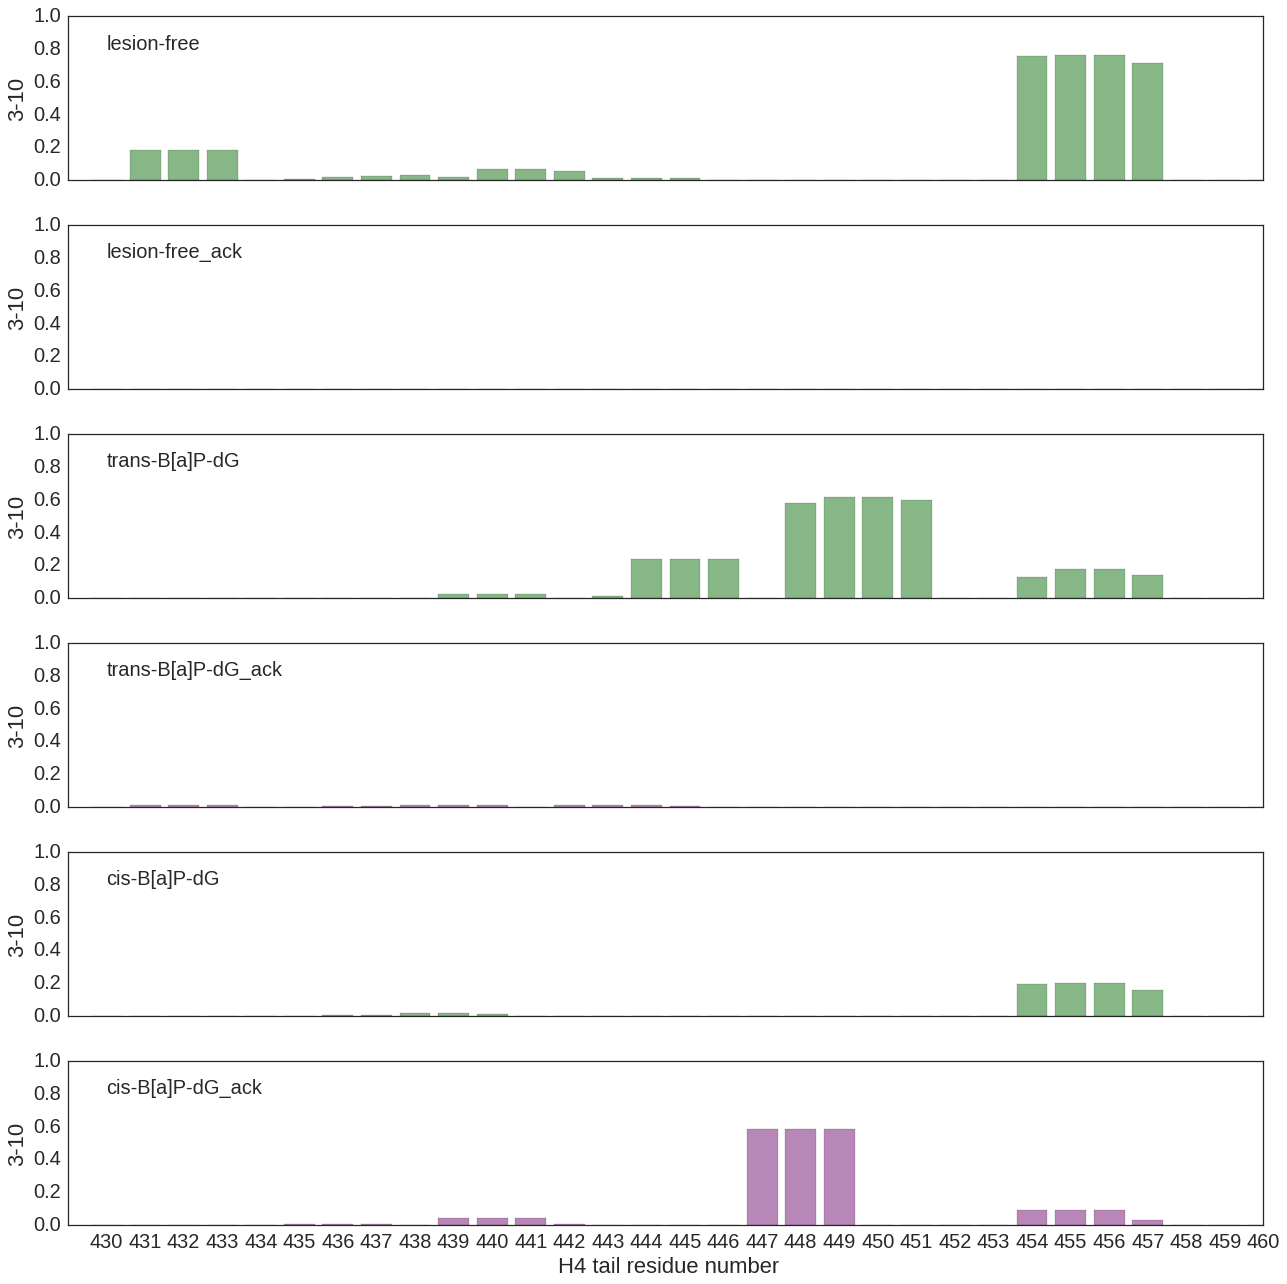

In [56]:
f, (ax1, ax2, ax3, ax4, ax5, ax6 ) = plt.subplots(6, 1, figsize=(18, 18), sharex=True,sharey=True)
plt.tight_layout()

sns.barplot(dfu["#Residue"],dfu["3-10"],color="green", alpha=0.5,ax=ax1)
sns.barplot(dfua["#Residue"],dfua["3-10"],color="purple", alpha=0.5,ax=ax2)

sns.barplot(dfu["#Residue"],dft["3-10"],color="green", alpha=0.5,ax=ax3)
sns.barplot(dfua["#Residue"],dfta["3-10"],color="purple",alpha=0.5, ax=ax4)
sns.barplot(dfu["#Residue"],dfc["3-10"],color="green",alpha=0.5, ax=ax5)
sns.barplot(dfua["#Residue"],dfca["3-10"],color="purple", alpha=0.5,ax=ax6)

ax1.text(0,0.8, 'lesion-free', fontsize=20)
ax3.text(0,0.8,  'trans-B[a]P-dG', fontsize=20)
ax5.text(0,0.8,  'cis-B[a]P-dG', fontsize=20)

ax2.text(0,0.8,  'lesion-free_ack', fontsize=20)
ax4.text(0,0.8,  'trans-B[a]P-dG_ack', fontsize=20)
ax6.text(0,0.8,  'cis-B[a]P-dG_ack', fontsize=20)

ax1.set_xlabel(' ')
ax1.set_ylabel('3-10')
ax2.set_xlabel(' ')
ax2.set_ylabel('3-10')
ax3.set_xlabel(' ')
ax3.set_ylabel('3-10')
ax4.set_xlabel(' ')
ax4.set_ylabel('3-10')
ax5.set_xlabel(' ')
ax5.set_ylabel('3-10')
ax6.set_xlabel(' H4 tail residue number')
ax6.set_ylabel('3-10')

ax6.set_xlim(-1,30)
ax6.set_ylim(0,1.0)

sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
sns.set_style("white")

f.savefig('three_ten.png', dpi=600)